In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from scipy.interpolate import RegularGridInterpolator

from tfinterp import regular_nd

session = tf.InteractiveSession()

/Users/dforeman/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


First, a 1D example:

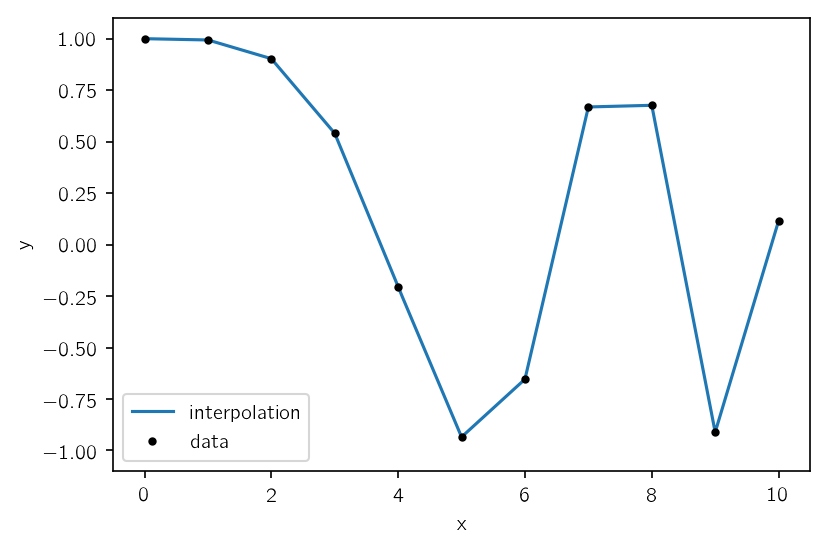

In [3]:
np.random.seed(42)
x = np.linspace(0, 10.0, 11)
y = np.cos(-x**2/9.0)

xtest = np.linspace(0, 10, 500)
ytest = regular_nd([x], y, xtest[:, None]).eval()

plt.plot(xtest, ytest, label="interpolation")
plt.plot(x, y, ".k", label="data")
plt.legend(loc=3)

plt.ylim(-1.1, 1.1)
plt.xlabel("x")
plt.ylabel("y");

Then, in 2D:

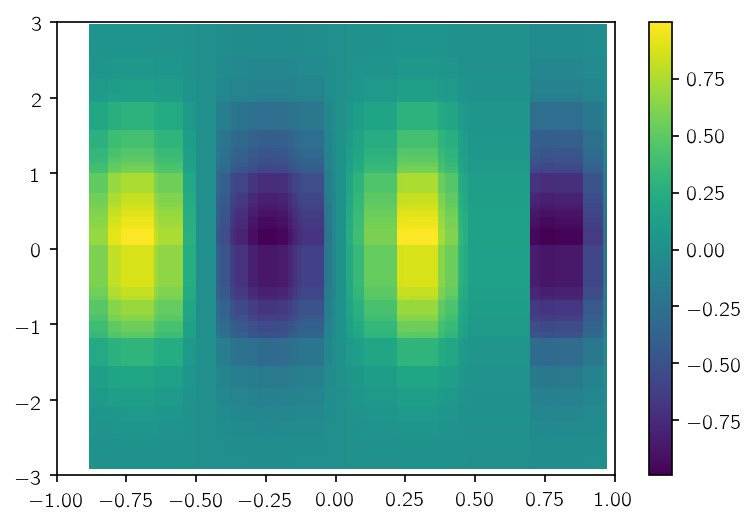

In [4]:
np.random.seed(123)
x = np.sort(np.random.uniform(-1, 1, 50))
y = np.sort(np.random.uniform(-3, 3, 47))
X, Y = np.meshgrid(x, y)

Z = np.sin(2*np.pi*X) * np.exp(-0.5*Y**2)

plt.pcolor(x, y, Z)
plt.xlim(-1, 1)
plt.ylim(-3, 3)
plt.colorbar()

And we'll interpolate this function onto some randomly distributed points in this space:

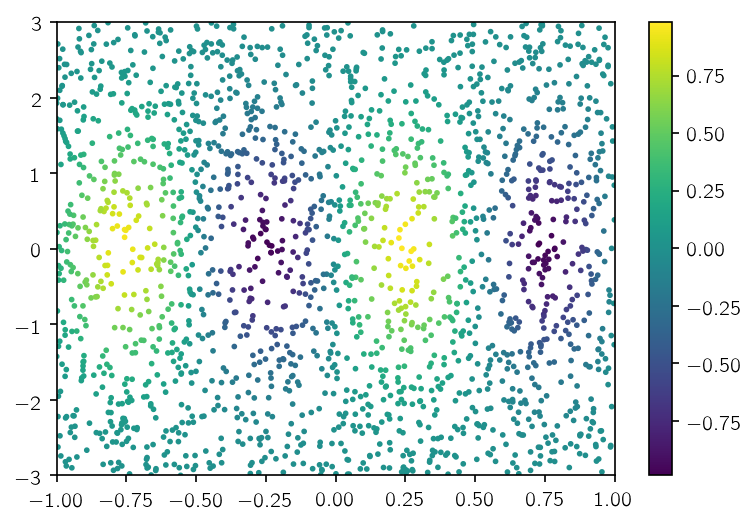

In [5]:
points = [x, y]
values = Z.T
xi = np.random.uniform(-1, 1, (2000, 2))
xi[:, 1] *= 3.0

ztest = regular_nd(points, values, xi)
plt.scatter(xi[:, 0], xi[:, 1], c=ztest.eval(), s=3)
plt.xlim(-1, 1)
plt.ylim(-3, 3)
plt.colorbar()